In [14]:
#install required libraries
import pandas as pd
import numpy as np
#data visualization packages
import matplotlib.pyplot as plt
import random 
import tensorflow as tf
#keras packages
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils



In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print ("X_train shape", x_train.shape)
print ("y_train shape", y_train.shape)
print ("X_test shape", x_test.shape)
print ("y_test shape", y_test.shape)



X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


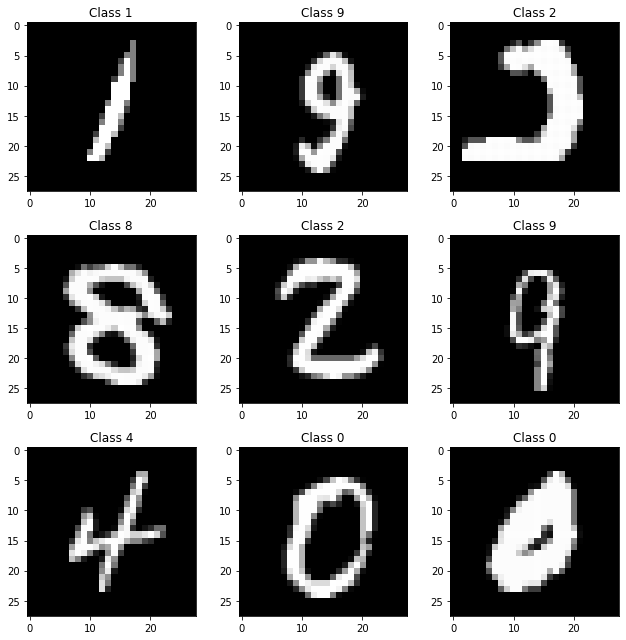

In [10]:
plt.rcParams['figure.figsize'] = (9,9)
for i in range (9):
    plt.subplot(3,3,i+1)
    num = random.randint (0, len(x_train))
    plt.imshow(x_train[num], cmap='gray', interpolation = 'none')
    plt.title("Class {}".format(y_train[num]))

plt.tight_layout()

In [12]:
x_train_norm = x_train/255
x_test_norm = x_test/255

x_valid, x_train = x_train_norm[:5000], x_train_norm[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

x_test = x_test_norm

In [15]:
np.random.seed(42)
tf.random.set_seed(42)

In [31]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28]))
#model.add(keras.layers.Dense(300, activation="relu"))
#model.add(keras.layers.Dense(100, activation="relu"))
#model.add(keras.layers.Dense(10, activation="softmax"))
model.add(Activation('relu'))
model. add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model. add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 activation (Activation)     (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                5130      
                                                                 
 activation_2 (Activation)   (None, 10)               

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 activation (Activation)     (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                5130      
                                                                 
 activation_2 (Activation)   (None, 10)               

In [33]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

#print(len(x_train))
#print(len(y_train[:50000]))
y_train = y_train[:50000]
print(len(y_train))

50000


In [34]:
model_history = model.fit(x_train,y_train,epochs=60,validation_data=(x_valid,y_valid))

Epoch 1/60
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1126
Epoch 2/60
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3013 - accuracy: 0.1130 - val_loss: 2.3009 - val_accuracy: 0.1126
Epoch 3/60
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3013 - accuracy: 0.1130 - val_loss: 2.3010 - val_accuracy: 0.1126
Epoch 4/60
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3013 - accuracy: 0.1130 - val_loss: 2.3011 - val_accuracy: 0.1126
Epoch 5/60
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3013 - accuracy: 0.1130 - val_loss: 2.3010 - val_accuracy: 0.1126
Epoch 6/60
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3013 - accuracy: 0.1130 - val_loss: 2.3010 - val_accuracy: 0.1126
Epoch 7/60
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3013 - accuracy: 0.1130 - val_loss: 2.3009 - val_accuracy:

In [35]:
x_sample = x_test[:5]
y_probability = model.predict(x_sample)

In [36]:
y_probability.round()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [37]:
y_predict = model.predict(x_sample)